In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
from tensorflow.keras import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv1D,MaxPool1D,Dropout,BatchNormalization
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets,metrics

## In this project, we are going to see whether the transaction is fraud or not_fraud

In [78]:
data = pd.read_csv('creditcard.csv')

In [79]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [81]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [82]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [83]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

##### here we can see that our data is highly imbalance, we need to balance the data to avoid getting biased result

In [84]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [85]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [86]:
non_fraud = non_fraud.sample(n=fraud.shape[0])

In [87]:
non_fraud.shape

(492, 31)

In [88]:
data = fraud.append(non_fraud, ignore_index=True)

data.shape

(984, 31)

In [89]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [90]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

#### now our data is balanced

In [91]:
x= data.drop(labels='Class',axis=1)
y = data['Class']

### now, spliting the data into train and test data

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [93]:
x_train.shape,x_test.shape

((787, 30), (197, 30))

In [94]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
845,39612.0,-0.768732,0.592259,2.369237,-0.258853,-0.000550,-0.139938,0.299079,0.116447,-0.128252,...,0.199008,-0.107132,-0.217122,-0.246579,-0.038932,0.081534,0.243674,0.094016,-0.100641,5.99
898,157405.0,-0.027787,0.056991,1.271120,-0.489991,-0.392036,0.497754,0.081255,0.309613,0.320262,...,0.084862,0.213337,0.502043,0.284872,0.766767,-0.718512,0.053372,0.016357,0.022774,89.90
45,18399.0,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,-6.815273,...,1.101250,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,1.00
536,47861.0,1.043573,-0.303002,1.041529,0.839913,-0.999586,-0.178883,-0.479471,0.105486,0.492920,...,0.023861,0.160316,0.552356,-0.140256,0.628328,0.426475,0.473051,-0.006559,0.020610,59.90
739,32829.0,-0.544310,-3.182294,0.184761,0.883076,-1.623389,1.200527,0.171217,0.299062,0.850955,...,1.536226,0.376436,-0.556289,-0.603574,-0.188718,-0.364095,0.865072,-0.163950,0.142915,846.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,59840.0,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,...,0.019626,0.401341,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,5.91
711,125777.0,-0.359716,0.426894,0.418018,-2.500935,0.526308,-0.587846,0.737162,-0.072717,-1.592804,...,0.170488,0.101538,0.299641,-0.209545,0.780092,0.106313,-0.427953,0.317162,0.185882,5.44
31,12095.0,-4.727713,3.044469,-5.598354,5.928191,-2.190770,-1.529323,-4.487422,0.916392,-1.307010,...,-0.207759,0.650988,0.254983,0.628843,-0.238128,-0.671332,-0.033590,-1.331777,0.705698,30.39
882,153990.0,-0.212120,0.305727,-1.075386,-1.606821,1.411276,4.598182,-0.005148,0.107755,0.682022,...,-0.447686,1.052848,0.730092,0.167295,0.757339,-0.972762,0.449967,0.025102,0.035653,169.00


##### now, we can see that there is huge variance between features,therefore we need to apply standard scalar

In [95]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [96]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

##### we have converted y_train and y_test into array as CNN model does not take series as input

In [97]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)  #we have converted our 2D data into 3D data
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [98]:
x_train.shape,x_test.shape

((787, 30, 1), (197, 30, 1))

# Building CNN model

In [99]:
model = Sequential()
model.add(Conv1D(32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv1D(128,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [100]:
model.compile(optimizer=Adam(learning_rate=0.00005),loss='binary_crossentropy',metrics=['accuracy'])

In [101]:
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),verbose=1)

Train on 787 samples, validate on 197 samples
Epoch 1/20
787/787 [==============================] - 2s 2ms/sample - loss: 0.9050 - accuracy: 0.6125 - val_loss: 0.6632 - val_accuracy: 0.5990
Epoch 2/20
787/787 [==============================] - 0s 437us/sample - loss: 0.5418 - accuracy: 0.7687 - val_loss: 0.6402 - val_accuracy: 0.6294
Epoch 3/20
787/787 [==============================] - 0s 418us/sample - loss: 0.4328 - accuracy: 0.8310 - val_loss: 0.6104 - val_accuracy: 0.6954
Epoch 4/20
787/787 [==============================] - 0s 399us/sample - loss: 0.4008 - accuracy: 0.8463 - val_loss: 0.5729 - val_accuracy: 0.7766
Epoch 5/20
787/787 [==============================] - 0s 446us/sample - loss: 0.3439 - accuracy: 0.8793 - val_loss: 0.5285 - val_accuracy: 0.8528
Epoch 6/20
787/787 [==============================] - 0s 413us/sample - loss: 0.3515 - accuracy: 0.8742 - val_loss: 0.4840 - val_accuracy: 0.8782
Epoch 7/20
787/787 [==============================] - 0s 418us/sample - loss: 0.

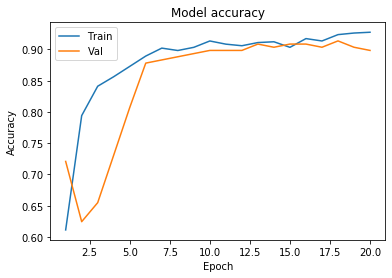

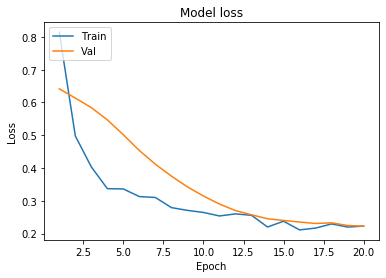

In [74]:
# Plot training & validation accuracy values
epoch_range = range(1, 21)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

##### we can see upto 20 epoch our model not overfit nor underfit, and shows accuracy 90.86%

# Adding maxpool layer

In [111]:
model = Sequential()
model.add(Conv1D(32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(128,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer=Adam(learning_rate=0.00005),loss='binary_crossentropy',metrics=['accuracy'])


history=model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test),verbose=1)

Train on 787 samples, validate on 197 samples
Epoch 1/30
787/787 [==============================] - 3s 3ms/sample - loss: 1.0145 - accuracy: 0.5693 - val_loss: 0.6720 - val_accuracy: 0.6244
Epoch 2/30
787/787 [==============================] - 0s 288us/sample - loss: 0.8270 - accuracy: 0.6353 - val_loss: 0.6743 - val_accuracy: 0.5787
Epoch 3/30
787/787 [==============================] - 0s 281us/sample - loss: 0.8099 - accuracy: 0.6442 - val_loss: 0.6828 - val_accuracy: 0.5635
Epoch 4/30
787/787 [==============================] - 0s 282us/sample - loss: 0.6939 - accuracy: 0.6849 - val_loss: 0.6903 - val_accuracy: 0.5584
Epoch 5/30
787/787 [==============================] - 0s 270us/sample - loss: 0.6822 - accuracy: 0.7039 - val_loss: 0.6940 - val_accuracy: 0.5635
Epoch 6/30
787/787 [==============================] - 0s 276us/sample - loss: 0.5881 - accuracy: 0.7408 - val_loss: 0.6891 - val_accuracy: 0.5787
Epoch 7/30
787/787 [==============================] - 0s 270us/sample - loss: 0.

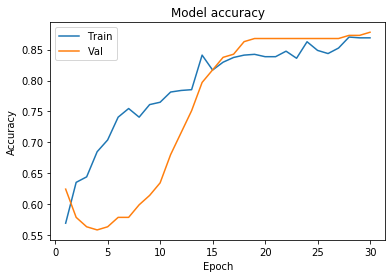

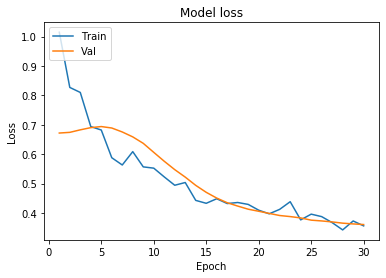

In [112]:
# Plot training & validation accuracy values
epoch_range = range(1, 31)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

##### after using maxpool model accuracy has been reduced